## 1.7 
Percentage of genes from PCA and DE in Spapros selections for different cell type annotation levels.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [8]:
RES_DIR = Path("/lustre/groups/ml01/workspace/louis.kuemmerle/projects/G1/results/spapros_smk_res")
DATA_DIR = Path("/lustre/groups/ml01/workspace/louis.kuemmerle/projects/G1/data/processed_rev")

In [3]:
df_sel = pd.read_csv(RES_DIR / "selection_overview.csv", index_col=0)
df_sel = df_sel.loc[df_sel["batch"] == "batch3",["selection_name","ct_key","n"]].set_index("selection_name")

In [4]:
cols = ["n_genes", "n_pca_genes", "n_DE_genes", "n_shared_genes", "n_DE_genes_1vsall", "n_DE_genes_specific"]
for col in cols:
    df_sel[col] = 0.0

for name in df_sel.index:
    df = pd.read_csv((RES_DIR / f"method_specific/{name}/probeset.csv"), index_col=0)
    df = df.loc[df["selection"]]
    # some genes were not pca preselected, but at the end they were added due to pca score! (this should be added to the probeset.csv)
    df.loc[df["tree_rank"].isnull(),"pca_selected"] = True 
        # we don't count genes labeled as DE after the tree selection, because those are solely added based on pca scores
    df_sel.loc[name,"n_genes"] = df.shape[0]
    df_sel.loc[name,"n_pca_genes"] = df["pca_selected"].sum()
    df_sel.loc[name,"n_DE_genes"] = (~df["celltypes_DE"].isnull()).sum()
    df_sel.loc[name, "n_shared_genes"] = (df["pca_selected"] & (~df["celltypes_DE"].isnull())).sum()
    df_sel.loc[name,"n_DE_genes_1vsall"] = (~df["celltypes_DE_1vsall"].isnull()).sum()
    df_sel.loc[name,"n_DE_genes_specific"] = (~df["celltypes_DE_specific"].isnull()).sum()
    
df_sel["PCA & DE"] = df_sel["n_shared_genes"] / df_sel["n_genes"]
df_sel["PCA"] = df_sel["n_pca_genes"] / df_sel["n_genes"] - df_sel["PCA & DE"]
df_sel["DE"] = df_sel["n_DE_genes"] / df_sel["n_genes"] - df_sel["PCA & DE"]

df_sel["total"] = df_sel["PCA & DE"] + df_sel["PCA"] + df_sel["DE"] 


In [25]:
df_sel

,ct_key,n,n_genes,n_pca_genes,n_DE_genes,n_shared_genes,n_DE_genes_1vsall,n_DE_genes_specific,PCA & DE,PCA,DE,total
selection_name,,,,,,,,,,,,
spapros_50_2211_HLCA_subset_raw_8,ann_level_1,50,50.0,49.0,7.0,6.0,7.0,0.0,0.120000,0.860000,0.020000,1.0
spapros_51_2211_HLCA_subset_raw_8,ann_level_2,50,50.0,50.0,18.0,18.0,11.0,7.0,0.360000,0.640000,0.000000,1.0
spapros_52_2211_HLCA_subset_raw_8,ann_level_3,50,50.0,42.0,41.0,33.0,28.0,13.0,0.660000,0.180000,0.160000,1.0
spapros_53_2211_HLCA_subset_raw_8,ann_level_4,50,50.0,36.0,43.0,29.0,30.0,13.0,0.580000,0.140000,0.280000,1.0
spapros_54_2211_HLCA_subset_raw_8,ann_level_5,50,50.0,36.0,45.0,31.0,33.0,12.0,0.620000,0.100000,0.280000,1.0
spapros_55_2211_HLCA_subset_raw_8,ann_level_1,100,100.0,99.0,7.0,6.0,7.0,0.0,0.060000,0.930000,0.010000,1.0
spapros_56_2211_HLCA_subset_raw_8,ann_level_2,100,100.0,100.0,21.0,21.0,13.0,8.0,0.210000,0.790000,0.000000,1.0
spapros_57_2211_HLCA_subset_raw_8,ann_level_3,100,100.0,92.0,50.0,42.0,33.0,17.0,0.420000,0.500000,0.080000,1.0
spapros_58_2211_HLCA_subset_raw_8,ann_level_4,100,100.0,85.0,68.0,53.0,46.0,22.0,0.530000,0.320000,0.150000,1.0


# plot

In [6]:
matplotlib.rcParams['font.family'] = ['sans-serif']

In [7]:
from matplotlib import rcParams
from matplotlib import colors

plt.rcParams['figure.dpi'] = 300 #150
plt.rcParams['savefig.dpi'] = 300 #150
SMALL_SIZE =   9  #17
MEDIUM_SIZE = 11  #19
BIGGER_SIZE = 13  #21
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [9]:
import scanpy as sc

adata = sc.read(DATA_DIR / "2211_HLCA_subset_raw.h5ad")

for ct_key in ["ann_level_1", "ann_level_2", "ann_level_3", "ann_level_4", "ann_level_5"]:
    print(len(adata.obs[ct_key].unique()))

4
11
27
51
61


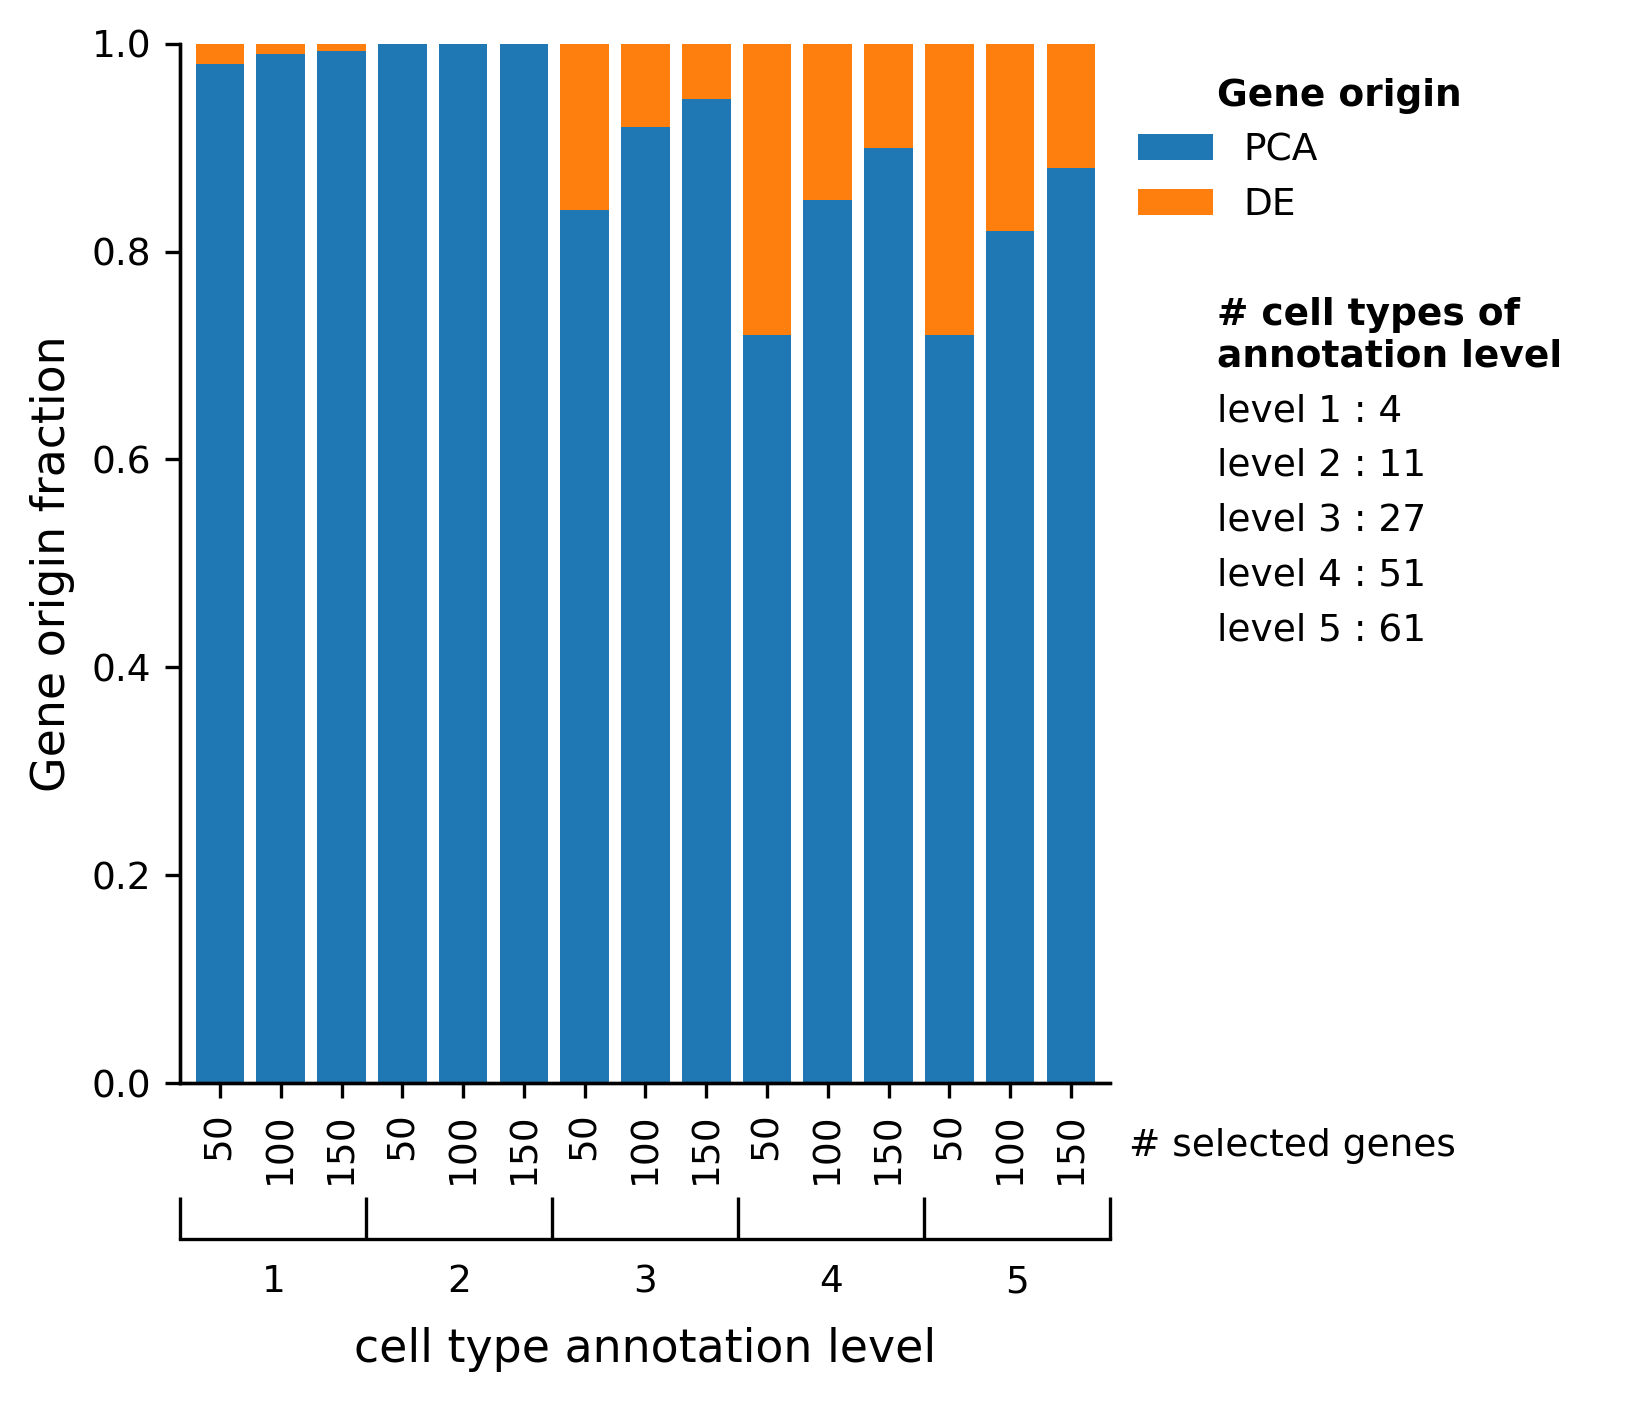

In [16]:
import numpy as np
import matplotlib.ticker as ticker

level_to_n_cts = {1: 4, 2: 11, 3: 27, 4: 51, 5: 61}

file_ending = "pdf" # "png"

if file_ending == "png":
    legend_shift = -108 # for dpi = 300; -55 if dpi = 150
elif file_ending == "pdf":
    legend_shift = -26

tmp = df_sel.copy().sort_values(["ct_key", "n"])
df = tmp[["PCA & DE", "PCA", "DE"]].copy()
df["PCA"] += df["PCA & DE"]
del df["PCA & DE"]

lvl_str_map = {f"ann_level_{i}":f"level {i}" for i in range(1,6)}
tmp["ct_key"] = tmp["ct_key"].apply(lambda c: lvl_str_map[c])

fig = plt.figure(figsize=(4, 6))

# Stacked bar plot
ax = df.plot.bar(stacked=True, figsize=(4, 4.5), width=0.8,
                 color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())

# Adding labels and title
plt.xlabel('')
plt.ylabel('Gene origin fraction')
plt.legend(title='Categories', frameon=False,
           loc='upper right', bbox_to_anchor=(1.4, 1))
# plt.tight_layout()

# Dont show upper and right axes lines
#ax.set_xticklabels(("n = " + tmp["n"].astype(str).apply(lambda n: n.rjust(3)) + ", " + tmp["ct_key"].astype(str)).values)
ax.set_xticklabels(tmp["n"].astype(str))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,1)


ax2 = ax.twiny()

ax2.spines["top"].set_position(("axes", -0.15))
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.tick_params('both', length=10, 
    direction='out', which='major'
)
#ax2.yaxis.set_ticks_position("right")
#ax2.yaxis.set_label_position("right")

labels_and_counts = {str(6-i): 3 for i in range(1,6)}
n_bars = 3 * 5 #ct_counts["Naive"] + ct_counts["Sham & MCAo"]
yticks = [1.0]
for _, count in labels_and_counts.items():
    yticks.append(yticks[-1] - count/n_bars)
ticklabel_pos = [(yticks[i]+yticks[i+1])/2 for i in range(len(yticks)-1)]

ax2.set_xticks(yticks)  # [0.0, 0.6, 1.0])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator(ticklabel_pos))  # [0.3, 0.8]))
ax2.xaxis.set_minor_formatter(
    ticker.FixedFormatter([key for key in labels_and_counts]))
# ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha='center', va='center')
ax2.spines['right'].set_visible(False)
#ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='both', which='minor', pad=-6)
plt.setp(ax2.xaxis.get_minorticklabels(), rotation=0, va="top")
#ax2.xaxis.get_majorticklabels()[2].set_y(10.1)
#for tick in ax2.get_xaxis().get_major_ticks():
#    tick.set_pad(8.)
#    tick.label1 = tick._get_text1()
ax2.set_xlabel("cell type annotation level", labelpad=-43)

# Add vertical line after each third bar, use y axis scale and cut in 5 parts
#ax2.vlines(np.arange(0.5, 15.5, 3), 0, 1, transform=ax2.get_xaxis_transform(), colors='k', linestyles='solid', linewidth=0.5)

# Custom legend:
# 1. the Categories (retrieve handles etc from current legend)
# 2. new legend paragraph: "# cell types of annotation level"

# 1.
handles, labels = ax.get_legend_handles_labels()
# Add extra handle for title "Gene origin"
handles = [plt.Rectangle((0,0),1,1, color='w', linewidth=0, label="Gene origin")] + handles
labels = ["Gene origin"] + labels

# add empty line
handles += [plt.Rectangle((0,0),1,1, color='w', linewidth=0, label="")]
labels += [""]

# 2.
# First add handle for title "# cell types of\nannotation level"
handles += [plt.Rectangle((0,0),1,1, color='w', linewidth=0, label="# cell types of\nannotation level")]
labels += ["# cell types of\nannotation level"]
handles += [plt.Rectangle((0,0),1,1, color='w', linewidth=0, label=f"{lvl} : {n_cts}") for lvl, n_cts in level_to_n_cts.items()]
labels += [f"level {lvl} : {n_cts}" for lvl, n_cts in level_to_n_cts.items()]

leg = ax.legend(handles, labels, frameon=False, loc='upper right', bbox_to_anchor=(1.55, 1))

titles = ["Gene origin", "# cell types of\nannotation level"]

leg = ax.get_legend()
for vpack in leg._legend_handle_box.get_children():
    for _ in vpack.get_children():
        if _.get_children()[1]._text._text in titles:
            _.get_children()[1]._text.set_weight('bold')
            _.get_children()[1]._text.set_position([legend_shift, 0])
        elif _.get_children()[1]._text._text.startswith("level"):
            _.get_children()[1]._text.set_position([legend_shift, 0])

# At text on same x position as legend at x axis height
ax.text(1.02, -0.06, "# selected genes", ha='left', va='center', transform=ax.transAxes)


fig.savefig(f"./figures/1_7_spapros_selection_origin.{file_ending}", bbox_inches='tight', transparent=True)

plt.show()
